<a href="https://colab.research.google.com/github/github-code12/Lunar-Rock-classification/blob/main/Classification_of_lunar_rocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!unzip '/content/drive/MyDrive/Hackathon-aicvs/Rock identification on lunar surface.zip'

Streaming output truncated to the last 5000 lines.
  inflating: DataSet/Train Images/Train Images/Small/ground1002.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1003.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1004.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1005.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1006.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1007.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1008.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1009.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1010.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1011.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1012.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1013.png  
  inflating: DataSet/Train Images/Train Images/Small/ground1014.png  
  inflating: DataSet/Train Images/Train

In [ ]:
import os

tr_l_list = os.listdir('/content/DataSet/Train Images/Train Images/Large')

tr_s_list = os.listdir('/content/DataSet/Train Images/Train Images/Small')

te_list = os.listdir('/content/DataSet/Test Images/Test Images')

print("\n -> Number of images in train large:", len(tr_l_list))
print("\n -> Number of images in train small:", len(tr_s_list))
print("\n -> Number of images in test:", len(te_list))



 -> Number of images in train large: 5999

 -> Number of images in train small: 5999

 -> Number of images in test: 7534



Training Data Images




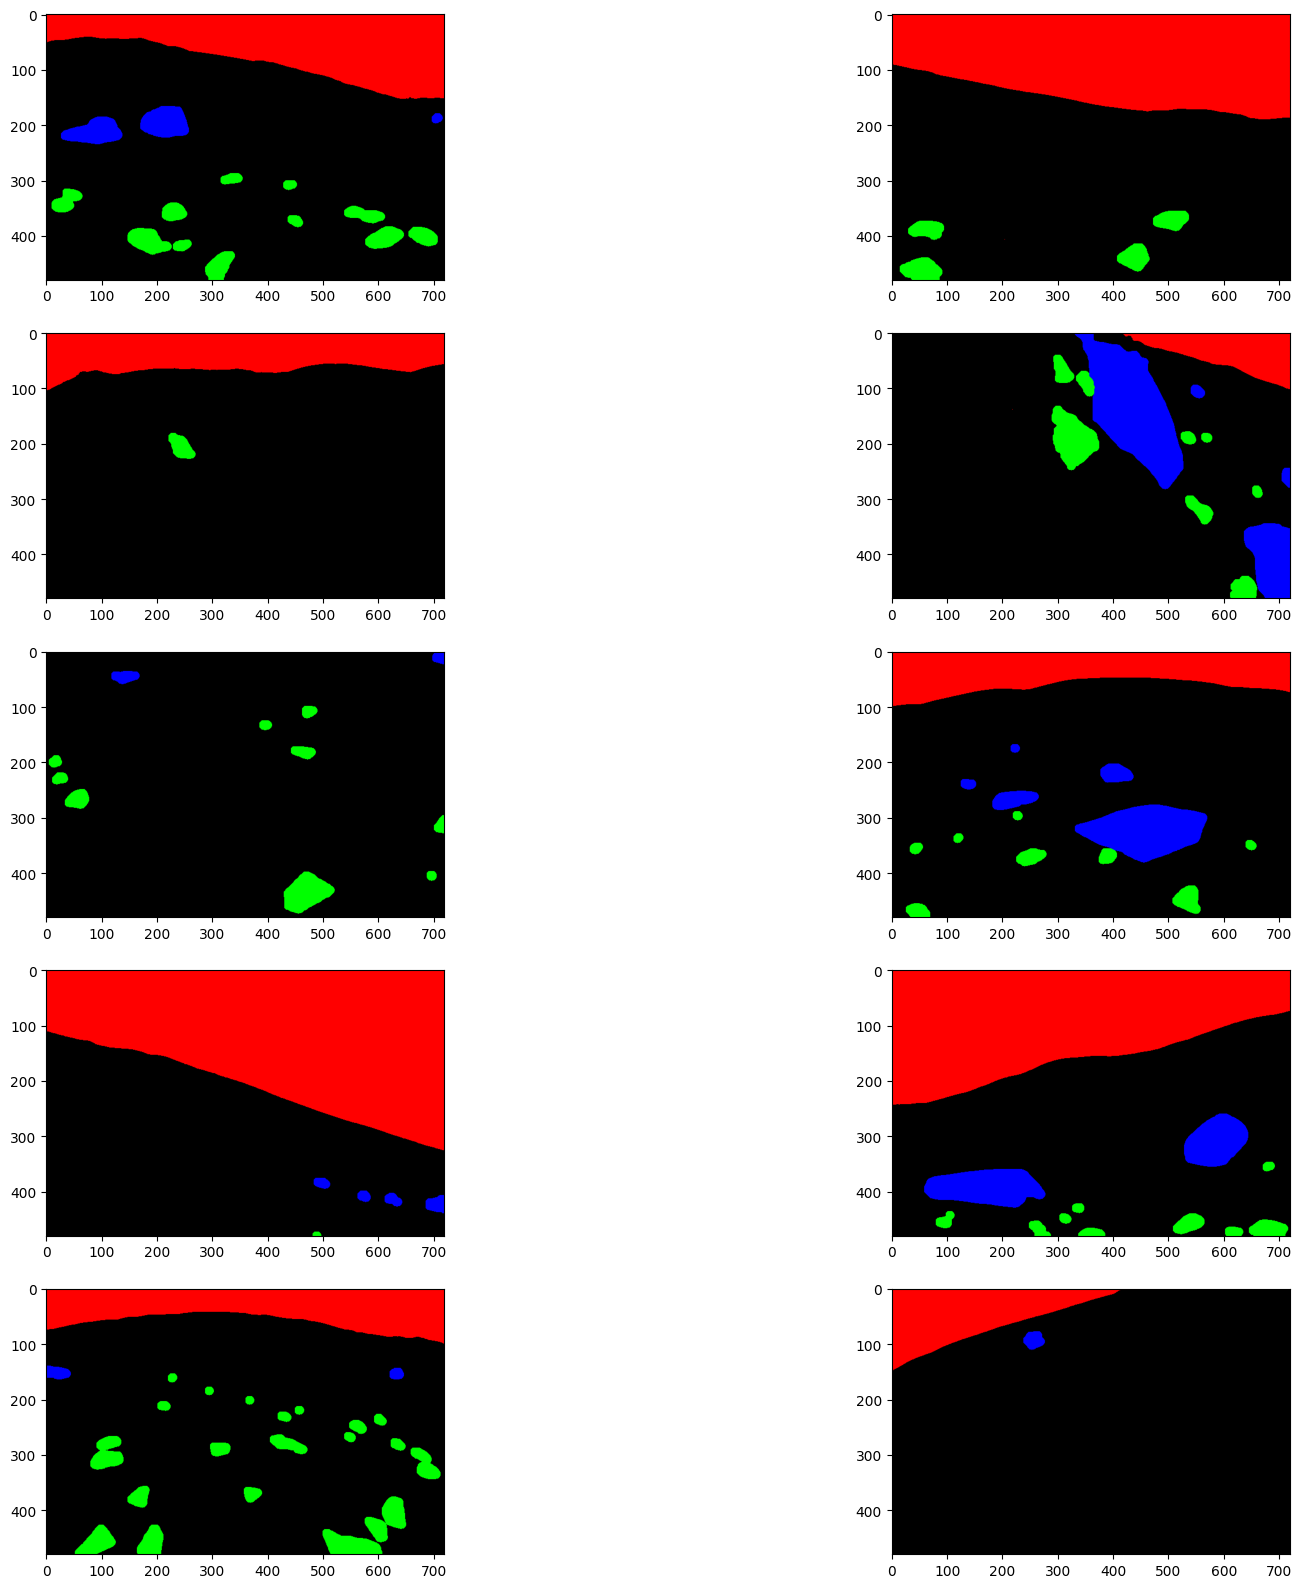

In [ ]:
import cv2

print("\nTraining Data Images")
print('\n')

fig = plt.figure(figsize=(20,20))

for i in range(1, 11):

    fig.add_subplot(5,2,i)

    read = cv2.imread('/content/DataSet/Train Images/Train Images/Large/' +tr_l_list[i])
    img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

plt.show()



Training Data Small




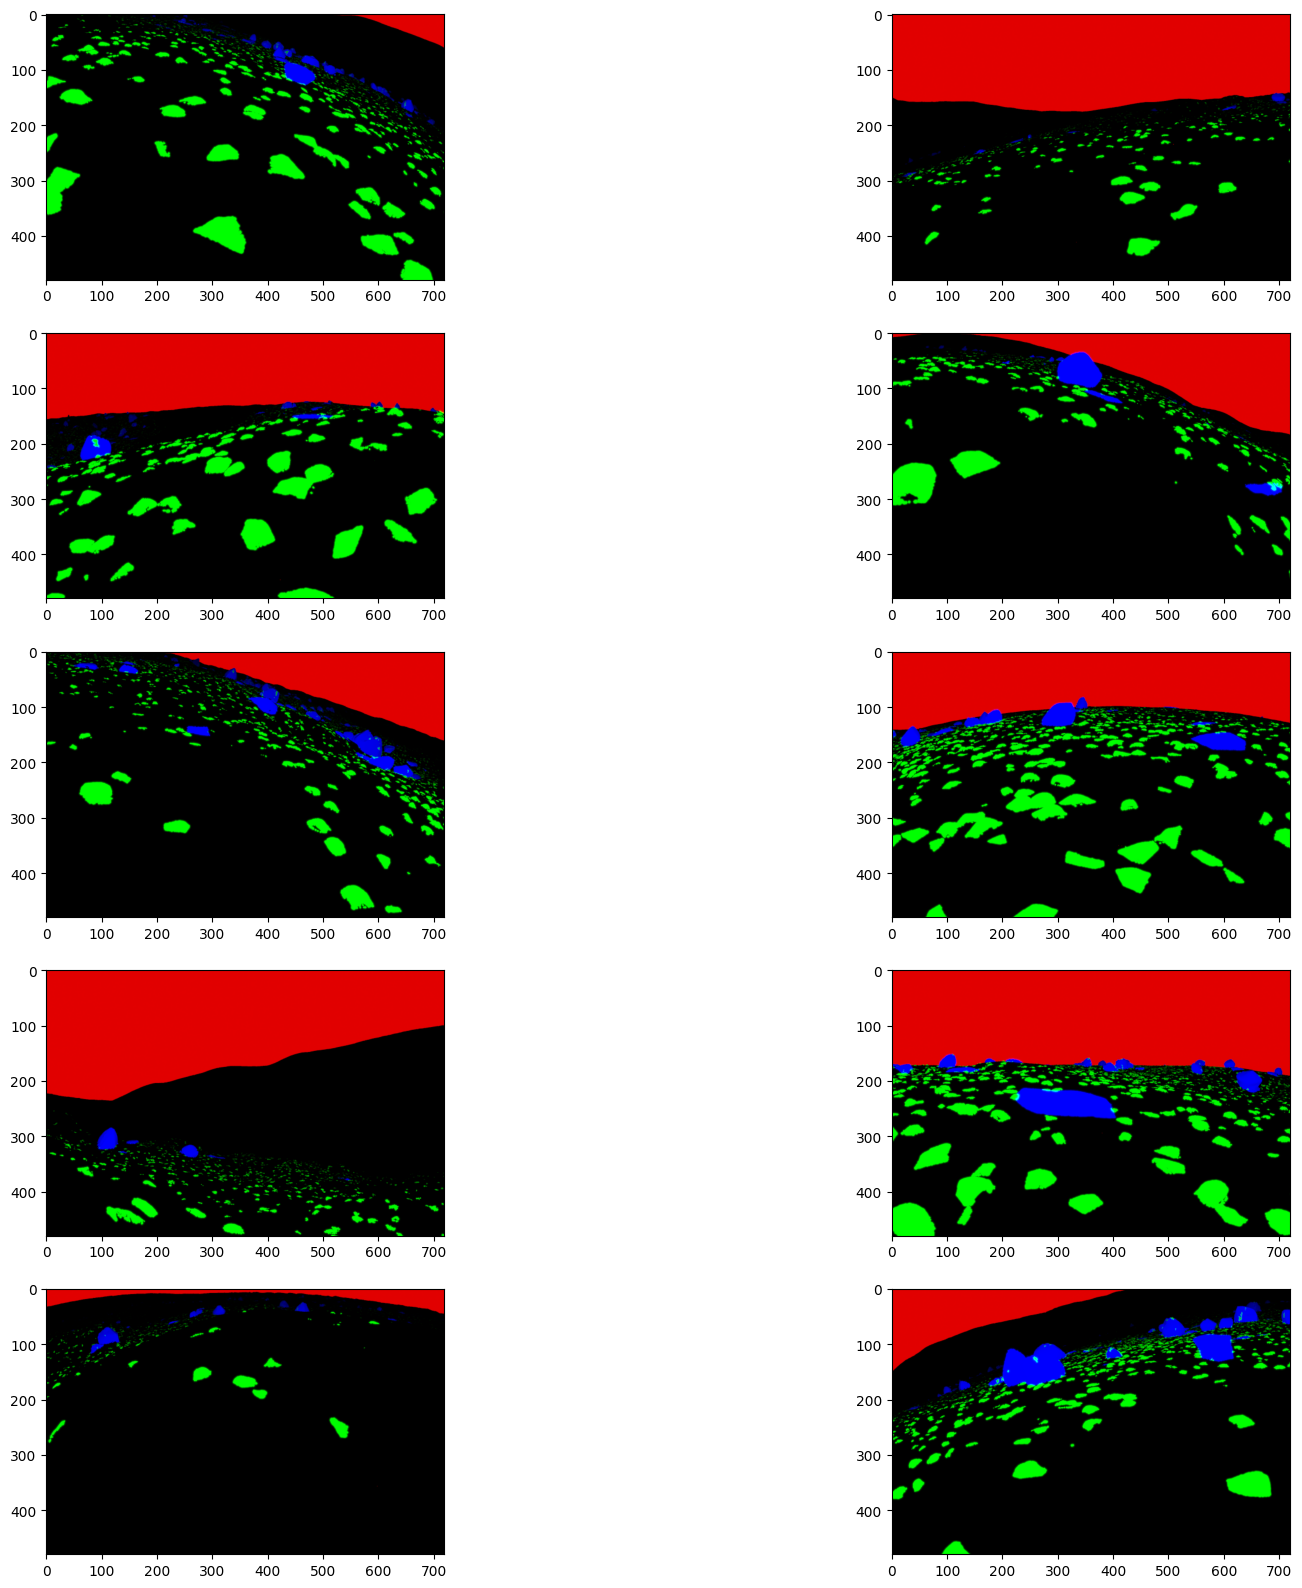

In [ ]:
import cv2

print("\nTraining Data Small")
print('\n')

fig = plt.figure(figsize=(20,20))

for i in range(1, 11):

    fig.add_subplot(5,2,i)

    read = cv2.imread('/content/DataSet/Train Images/Train Images/Small/'+tr_s_list[i])
    img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

plt.show()


In [ ]:
df = pd.read_csv('/content/DataSet/train.csv')

print("\n -> Displaying head of train dataframe.\n")

df.head()



 -> Displaying head of train dataframe.



,Image_File,Class
0,clean2416.png,Large
1,ground4022.png,Small
2,ground0340.png,Small
3,ground2110.png,Small
4,clean1581.png,Large


In [ ]:
print("\n -> Shape of train data:", df.shape)
print("\n -> Number of rows in train data:", df.shape[0])
print("\n -> Number of columns in train data:", df.shape[1])
print("\n -> Number of images in train data:", df.shape[0])
print("\n -> Number of images of class Large in train data:",df.Class.value_counts()[1])
print("\n -> Number of images of class Small in train data:",df.Class.value_counts()[0])



 -> Shape of train data: (11998, 2)

 -> Number of rows in train data: 11998

 -> Number of columns in train data: 2

 -> Number of images in train data: 11998

 -> Number of images of class Large in train data: 5999

 -> Number of images of class Small in train data: 5999



 -> Count of Large and Small class.

Large    5999
Small    5999
Name: Class, dtype: int64

 -> Graphically visualzing count of Large and Small class.



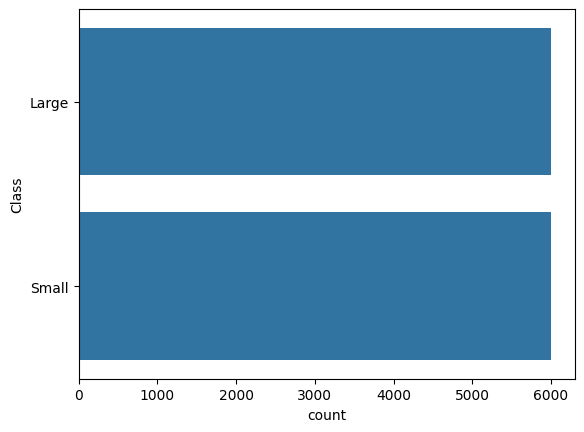

In [ ]:
print("\n -> Count of Large and Small class.\n")
print(df.Class.value_counts())
print("\n -> Graphically visualzing count of Large and Small class.\n")

sns.countplot(df.Class)
plt.show()


In [ ]:
import keras

from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rotation_range = 30,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            rescale = 1/255,
                            zoom_range = 0.2)


In [ ]:
import cv2

 -> Original image from Train Large



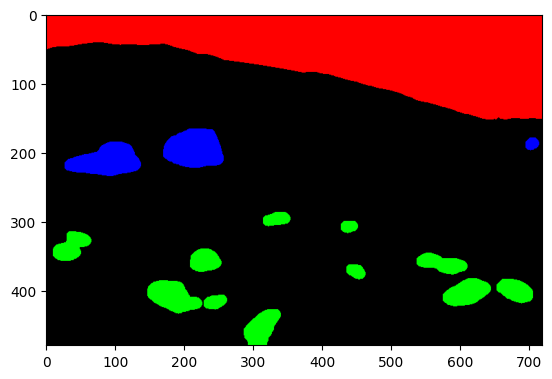

In [ ]:
print(" -> Original image from Train Large\n")

re = cv2.imread('/content/DataSet/Train Images/Train Images/Large/'+tr_l_list[1])
re = cv2.cvtColor(re, cv2.COLOR_BGR2RGB)

plt.imshow(re)
plt.show()


 -> Generated image from Train Large



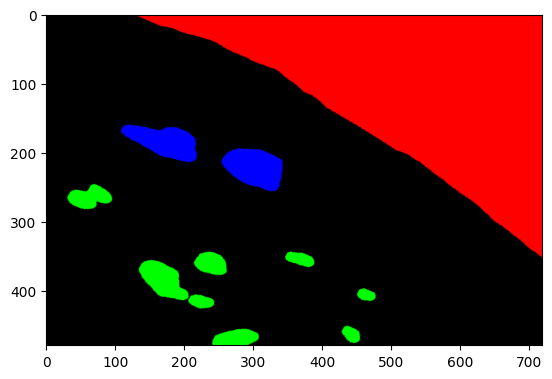

In [ ]:
print(" -> Generated image from Train Large\n")

re = cv2.imread('/content/DataSet/Train Images/Train Images/Large/'+tr_l_list[1])
re = cv2.cvtColor(re, cv2.COLOR_BGR2RGB)

plt.imshow(img_gen.random_transform(re))
plt.show()


In [ ]:
print("\n -> Viewing number of classes in train data\n")

print(img_gen.flow_from_directory('/content/DataSet/Train Images/Train Images'))



 -> Viewing number of classes in train data

Found 11998 images belonging to 2 classes.


In [ ]:
print("\n -> Shape of image:", re.shape)
print("\n -> Width of image:", re.shape[0])
print("\n -> Width of image:", re.shape[1])
print("\n -> Number of color channels of image:", re.shape[2])



 -> Shape of image: (480, 720, 3)

 -> Width of image: 480

 -> Width of image: 720

 -> Number of color channels of image: 3


In [ ]:
input_shape = (480, 480, 3)

In [ ]:
import cv2
from keras.models import Sequential, Model

from keras import regularizers

from keras.layers import Activation, Conv2D, MaxPool2D, Dropout, Dense, Flatten


In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_2 = ModelCheckpoint("lunar_model_2.h5", monitor = "train_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_2 = EarlyStopping(monitor = 'train_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_2 = TensorBoard(log_dir = "drive/My Drive/Lunar Rock/lunar_graph_2",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_2 = [checkpoint_2, earlystop_2, tensorboard_2]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 478, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 239, 239, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 239, 239, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 237, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 118, 118, 64)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 118, 118, 64)      0

In [ ]:
batch_size = 16

train_img_gen = img_gen.flow_from_directory(('/content/DataSet/Train Images/Train Images'),
                                           target_size = input_shape[:2],
                                           batch_size = batch_size,
                                           class_mode = 'binary')


Found 11998 images belonging to 2 classes.


In [ ]:
print("\n -> Class indices.\n")

print(train_img_gen.class_indices)



 -> Class indices.

{'Large': 0, 'Small': 1}


In [ ]:
import warnings
warnings.filterwarnings('ignore')

results = model.fit_generator(train_img_gen, epochs = 20, steps_per_epoch = 100, callbacks = callback_2)


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 1.4810 - accuracy: 0.7188

100/100 [==============================] - 129s 1s/step - loss: 1.4810 - accuracy: 0.7188
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.6445 - accuracy: 0.9006

100/100 [==============================] - 115s 1s/step - loss: 0.6445 - accuracy: 0.9006
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.3254 - accuracy: 0.9712

100/100 [==============================] - 116s 1s/step - loss: 0.3254 - accuracy: 0.9712
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.9718

100/100 [==============================] - 120s 1s/step - loss: 0.2850 - accuracy: 0.9718
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9675

100/100 [==============================] - 114s 1s/step - loss: 0.2374 - accuracy: 0.9675
Epoch 6/20
100/100 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9756

100/100 [==============================] - 112s 1s/step - loss: 0.1894 - accuracy: 0.9756
Epoch 7/20
100/100 [==============================] - ETA: 0s - loss: 0.1389 - accuracy: 0.9881

100/100 [==============================] - 113s 1s/step - loss: 0.1389 - accuracy: 0.9881
Epoch 8/20
100/100 [==============================] - ETA: 0s - loss: 0.1116 - accuracy: 0.9881

100/100 [==============================] - 112s 1s/step - loss: 0.1116 - accuracy: 0.9881
Epoch 9/20
100/100 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.9688

100/100 [==============================] - 115s 1s/step - loss: 0.1834 - accuracy: 0.9688
Epoch 10/20
100/100 [==============================] - ETA: 0s - loss: 0.1666 - accuracy: 0.9806

100/100 [==============================] - 112s 1s/step - loss: 0.1666 - accuracy: 0.9806
Epoch 11/20
100/100 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9912

100/100 [==============================] - 114s 1s/step - loss: 0.1064 - accuracy: 0.9912
Epoch 12/20
100/100 [==============================] - ETA: 0s - loss: 0.3464 - accuracy: 0.9669

100/100 [==============================] - 114s 1s/step - loss: 0.3464 - accuracy: 0.9669
Epoch 13/20
100/100 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9793

100/100 [==============================] - 116s 1s/step - loss: 0.1742 - accuracy: 0.9793
Epoch 14/20
100/100 [==============================] - ETA: 0s - loss: 0.1777 - accuracy: 0.9744

100/100 [==============================] - 116s 1s/step - loss: 0.1777 - accuracy: 0.9744
Epoch 15/20
100/100 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9762

100/100 [==============================] - 115s 1s/step - loss: 0.1660 - accuracy: 0.9762
Epoch 16/20
100/100 [==============================] - ETA: 0s - loss: 0.1400 - accuracy: 0.9819

100/100 [==============================] - 117s 1s/step - loss: 0.1400 - accuracy: 0.9819
Epoch 17/20
100/100 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.9793

100/100 [==============================] - 114s 1s/step - loss: 0.1534 - accuracy: 0.9793
Epoch 18/20
100/100 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.9850

100/100 [==============================] - 114s 1s/step - loss: 0.1323 - accuracy: 0.9850
Epoch 19/20
100/100 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9844

100/100 [==============================] - 117s 1s/step - loss: 0.1300 - accuracy: 0.9844
Epoch 20/20
100/100 [==============================] - ETA: 0s - loss: 0.1144 - accuracy: 0.9925

100/100 [==============================] - 116s 1s/step - loss: 0.1144 - accuracy: 0.9925


Training Accuracy = 99.25%

In [ ]:
print("Original small image after resizing\n")

r = cv2.imread('/content/DataSet/Train Images/Train Images/Small/'+tr_s_list[1])
r = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)
r = cv2.resize(r, (480, 480))
r = np.expand_dims(r, axis = 0)


Original small image after resizing



In [ ]:
test = pd.read_csv('/content/DataSet/test.csv')
print("\n -> Displaying head of test data.\n")
test.head()



 -> Displaying head of test data.



,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [ ]:
print("\n -> Shape of test data:", test.shape)
print("\n -> Number of rows in test data:", test.shape[0])
print("\n -> Number of columns in test data:", test.shape[1])
print("\n -> Number of images in test data:", test.shape[0])



 -> Shape of test data: (7534, 2)

 -> Number of rows in test data: 7534

 -> Number of columns in test data: 2

 -> Number of images in test data: 7534


In [ ]:
import cv2

print("\nFirst 10 images from test")
print('*'*35, '\n')

fig = plt.figure(figsize=(20,20))

for i in range(1, 11):

    fig.add_subplot(5,2,i)

    read = cv2.imread('/content/DataSet/Test Images/Test Images/'+te_list[i])
    img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

plt.show()



In [ ]:
test_files = np.array(test['Image_File'])

test_files[:5]


array(['lg 988 (1).png', 'lg 988 (10).png', 'lg 988 (100).png',
       'lg 988 (101).png', 'lg 988 (102).png'], dtype=object)

In [ ]:
test_arr = []

for i in range(len(test_files)):

    t = cv2.imread('/content/DataSet/Test Images/Test Images/'+test_files[i])
    t = cv2.cvtColor(t, cv2.COLOR_BGR2RGB)
    t = cv2.resize(t, (480, 480))
    t = np.expand_dims(t, axis = 0)
    t = np.array(t)
    test_arr.append(t)


In [ ]:
predict = []

for i in range(len(test_arr)):

    pred = model.predict(test_arr[i])
    predict.append(pred)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


In [ ]:
test.head()

,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [ ]:
pred_list = []

for i in range(len(predict)):

    pred = int(predict[i][0][0])
    pred_list.append(pred)


In [ ]:
test['Class'] = pred_list

In [ ]:
print("\n -> Class indices.\n")
train_img_gen.class_indices



 -> Class indices.



{'Large': 0, 'Small': 1}